In [1]:
import os
import pydicom
import pandas as pd
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

In [2]:
BASE_PATH = "/opt/data/liver_cancer"
TRAIN_PATH = os.path.join(BASE_PATH, "train_dataset")
TEST_PATH = os.path.join(BASE_PATH, "test_dataset")
TRAIN_LABEL_PATH = os.path.join(BASE_PATH, "train_label.csv")
SUBMIT_EXAMPLE_PATH = os.path.join(BASE_PATH, "submit_example.csv")

In [3]:
train_label = pd.read_csv(TRAIN_LABEL_PATH)
train_label.head()

,id,ret
0,0013EDC2-8D7A-4A41-AEB5-D3BB592306D2,1
1,0030CBD1-2472-42C4-8CE4-E01A4E8E2F09,1
2,0036DF08-EEEC-467C-8CF1-5A54E0B13CE8,1
3,003D2553-266F-47E3-A420-F5B8F95217A7,0
4,0072E2C1-C395-409B-8078-365DD5C0513E,0


In [4]:
ret = train_label.loc[:, "ret"]
print (ret.count())
print (pd.value_counts(ret))

3600
0    2100
1    1500
Name: ret, dtype: int64


In [5]:
submit = pd.read_csv(SUBMIT_EXAMPLE_PATH)
submit.head()

,id,ret
0,001C8DA7-9969-4C51-A957-89F4C6E4999F,0
1,00468119-70E6-4C33-9F30-64BC91134253,0
2,005E0BA1-3B27-40F0-A231-5BAE6246599D,0
3,007EFD04-DBE6-4B14-A1AA-8A500C1D1EBC,0
4,008D289C-CE20-4F69-A756-0887895936E8,0


In [6]:
print (submit.loc[:, "id"].count())

3974


In [9]:
def read_img_from_folder(folder_path):
    ct_imgs = {}
    for ct_folder_name in tqdm(os.listdir(folder_path)):
        ct_folder_path = os.path.join(folder_path, ct_folder_name)
        ct_imgs[ct_folder_name] = {}
        for slice_name in os.listdir(ct_folder_path):
            slice_folder_path = os.path.join(ct_folder_path, slice_name)
            slice_dicom = pydicom.read_file(slice_folder_path)
            slice_img = slice_dicom.pixel_array
            ct_imgs[ct_folder_name][slice_name.split(".")[0]] = slice_img
        break
    return ct_imgs

In [10]:
ct_imgs = read_img_from_folder(TRAIN_PATH)

  0%|          | 0/3600 [00:00<?, ?it/s]


In [11]:
ct_imgs.keys()

dict_keys(['1C514FA5-3C46-4938-A047-E09020A2E563'])

In [12]:
ct_imgs["1C514FA5-3C46-4938-A047-E09020A2E563"].keys()

dict_keys(['68249c34-4289-47bc-8dd9-674f12d2234a_00026', '68249c34-4289-47bc-8dd9-674f12d2234a_00011', '68249c34-4289-47bc-8dd9-674f12d2234a_00029', '68249c34-4289-47bc-8dd9-674f12d2234a_00022', '68249c34-4289-47bc-8dd9-674f12d2234a_00028', '68249c34-4289-47bc-8dd9-674f12d2234a_00014', '68249c34-4289-47bc-8dd9-674f12d2234a_00002', '68249c34-4289-47bc-8dd9-674f12d2234a_00018', '68249c34-4289-47bc-8dd9-674f12d2234a_00005', '68249c34-4289-47bc-8dd9-674f12d2234a_00031', '68249c34-4289-47bc-8dd9-674f12d2234a_00033', '68249c34-4289-47bc-8dd9-674f12d2234a_00021', '68249c34-4289-47bc-8dd9-674f12d2234a_00032', '68249c34-4289-47bc-8dd9-674f12d2234a_00023', '68249c34-4289-47bc-8dd9-674f12d2234a_00001', '68249c34-4289-47bc-8dd9-674f12d2234a_00027', '68249c34-4289-47bc-8dd9-674f12d2234a_00025', '68249c34-4289-47bc-8dd9-674f12d2234a_00015', '68249c34-4289-47bc-8dd9-674f12d2234a_00004', '68249c34-4289-47bc-8dd9-674f12d2234a_00007', '68249c34-4289-47bc-8dd9-674f12d2234a_00030', '68249c34-4289-47bc-8dd

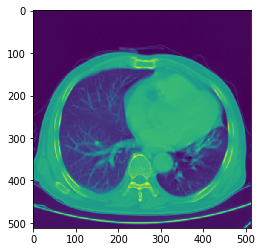

In [13]:
plt.imshow(ct_imgs["1C514FA5-3C46-4938-A047-E09020A2E563"]["68249c34-4289-47bc-8dd9-674f12d2234a_00001"])

In [14]:
def plot_for_ct(ct_name, ct_imgs=ct_imgs, nb_rows=5, nb_cols=5):
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(16, 16))

    n = 1
    prefix = list(ct_imgs[ct_name].keys())[0][:-2]
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            dc_name = prefix+"0"+str(n) if n <= 9 else prefix+str(n)
            axs[i, j].imshow(ct_imgs[ct_name][dc_name])
            n += 1

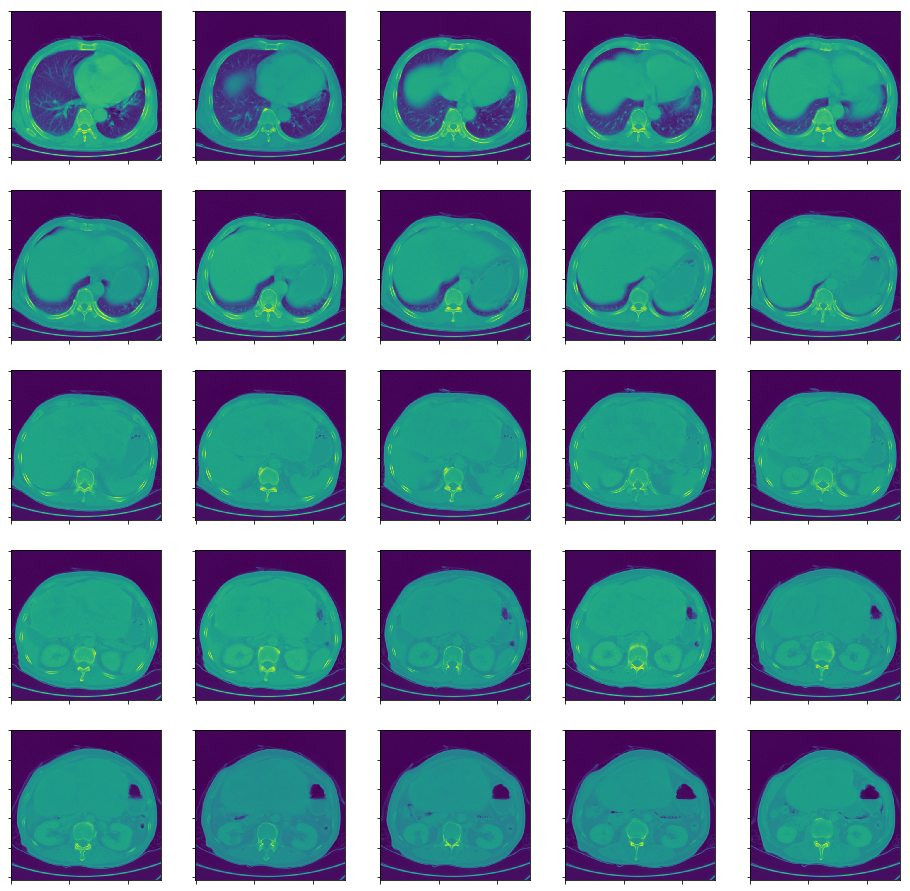

In [15]:
plot_for_ct("1C514FA5-3C46-4938-A047-E09020A2E563")